# Analisis de Productividad Comercial

## Dashboard

Puedes descargar el archivo del dashboard y observarlo en `Power BI` a través del siguiente archivo [Análisis de productividad comercial](./Dashboard/Analisis%20de%20productividad%20comercial.pbix)


<img src='https://res.cloudinary.com/dzc8agefr/image/upload/v1691860198/5_ajw7vx.png' alt='Dashboard'>


### Importar librerias

In [488]:
%pip install openpyxl

In [489]:
# importar librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl # manipulación archivos .xls, .xlsx
import calendar
import locale


## Configurar idio a español

In [490]:
# Configurar el idioma en español
locale.setlocale(locale.LC_TIME, 'es_ES.utf8')  
# Cambiar 'es_ES.utf8' por la configuración regional adecuada en tu sistema

'es_ES.utf8'

## Establecer apariencia gráficos

In [491]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (8, 10)

## Cargar datos

In [492]:
xlsx = pd.ExcelFile('./Dataset/data_prueba_cpa_v1 - copia.xlsx')
print(xlsx.sheet_names)
df = xlsx.parse('data_prueba_cpa')
df.head()

['data_prueba_cpa', 'glosario']


,Año_mes,Celula,Asesor,0021_meta,0022_ventas,0023_cumplimiento,0045_%_Efectividad_SQL,0044_%_Ventas_mercadeo,0031_ventas_mismo_mes,0041_%_Ventas_leads_mes,...,0033_ventas_0_a_100,0043_%_Ventas_leads_cero_a_cien,0024_seg_atrasados,0025_seg_abiertos,0026_descartes_totales,0027_seg_creados_mismo_mes,0028_descartes_mismo_mes,0029_%_descarte_mismo_mes,00291_descartes_dia,00292_avg_seg_creados_dia
0,202112,DG1,A7,79.0,55.0,69.6%,37.7%,52.7%,26.0,0.47,...,15.0,27.3%,4.0,10.0,57.0,69.0,35.0,50.7%,0.0,3.3
1,202112,DG1,A16,79.0,43.0,54.4%,24.4%,55.8%,19.0,0.44,...,11.0,25.6%,1.0,73.0,35.0,78.0,21.0,26.9%,2.0,3.7
2,202112,DG1,A18,20.0,24.0,120.0%,15.4%,79.2%,14.0,0.58,...,8.0,33.3%,0.0,50.0,64.0,91.0,44.0,48.4%,2.0,4.3
3,202112,DG1,A19,79.0,51.0,64.6%,44.9%,49.0%,22.0,0.43,...,13.0,25.5%,7.0,19.0,29.0,49.0,16.0,32.7%,0.0,2.3
4,202112,DG1,A20,13.0,22.0,169.2%,15.4%,54.5%,8.0,0.36,...,2.0,9.1%,5.0,8.0,53.0,52.0,38.0,73.1%,0.0,2.5


## Colecta y validación de datos

In [493]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Año_mes                           946 non-null    int64  
 1   Celula                            946 non-null    object 
 2   Asesor                            946 non-null    object 
 3   0021_meta                         904 non-null    float64
 4   0022_ventas                       904 non-null    float64
 5   0023_cumplimiento                 904 non-null    object 
 6   0045_%_Efectividad_SQL            938 non-null    object 
 7   0044_%_Ventas_mercadeo            938 non-null    object 
 8   0031_ventas_mismo_mes             938 non-null    float64
 9   0041_%_Ventas_leads_mes           938 non-null    float64
 10  0032_ventas_mes_anterior          938 non-null    float64
 11  0042_%_Ventas_leads_mes_anterior  938 non-null    float64
 12  0033_ven

## Transformar columnas tipo object a float

Tenemos una excepción de las columnas Celula y Asesor

In [494]:
# for col in df.columns[3:]:
#     if df[col].dtype == 'object':
#         df[col] = df[col].str[:-1].astype(float)

# df.head()

In [495]:
df.dtypes

Año_mes                               int64
Celula                               object
Asesor                               object
0021_meta                           float64
0022_ventas                         float64
0023_cumplimiento                    object
0045_%_Efectividad_SQL               object
0044_%_Ventas_mercadeo               object
0031_ventas_mismo_mes               float64
0041_%_Ventas_leads_mes             float64
0032_ventas_mes_anterior            float64
0042_%_Ventas_leads_mes_anterior    float64
0033_ventas_0_a_100                 float64
0043_%_Ventas_leads_cero_a_cien      object
0024_seg_atrasados                  float64
0025_seg_abiertos                   float64
0026_descartes_totales              float64
0027_seg_creados_mismo_mes          float64
0028_descartes_mismo_mes            float64
0029_%_descarte_mismo_mes            object
00291_descartes_dia                 float64
00292_avg_seg_creados_dia           float64
dtype: object

## ¿Existen valores nulos?

In [496]:
df.isnull().sum()

Año_mes                              0
Celula                               0
Asesor                               0
0021_meta                           42
0022_ventas                         42
0023_cumplimiento                   42
0045_%_Efectividad_SQL               8
0044_%_Ventas_mercadeo               8
0031_ventas_mismo_mes                8
0041_%_Ventas_leads_mes              8
0032_ventas_mes_anterior             8
0042_%_Ventas_leads_mes_anterior     8
0033_ventas_0_a_100                  8
0043_%_Ventas_leads_cero_a_cien      8
0024_seg_atrasados                  42
0025_seg_abiertos                   42
0026_descartes_totales              42
0027_seg_creados_mismo_mes          42
0028_descartes_mismo_mes            42
0029_%_descarte_mismo_mes           42
00291_descartes_dia                 42
00292_avg_seg_creados_dia           42
dtype: int64

## Eliminando columnas calculadas

In [497]:
columnas_drop = df.filter(like='%')
df.drop(columns=columnas_drop, inplace=True)
df = df.drop('0023_cumplimiento', axis=1)

In [498]:
df

,Año_mes,Celula,Asesor,0021_meta,0022_ventas,0031_ventas_mismo_mes,0032_ventas_mes_anterior,0033_ventas_0_a_100,0024_seg_atrasados,0025_seg_abiertos,0026_descartes_totales,0027_seg_creados_mismo_mes,0028_descartes_mismo_mes,00291_descartes_dia,00292_avg_seg_creados_dia
0,202112,DG1,A7,79.0,55.0,26.0,3.0,15.0,4.0,10.0,57.0,69.0,35.0,0.0,3.3
1,202112,DG1,A16,79.0,43.0,19.0,5.0,11.0,1.0,73.0,35.0,78.0,21.0,2.0,3.7
2,202112,DG1,A18,20.0,24.0,14.0,5.0,8.0,0.0,50.0,64.0,91.0,44.0,2.0,4.3
3,202112,DG1,A19,79.0,51.0,22.0,3.0,13.0,7.0,19.0,29.0,49.0,16.0,0.0,2.3
4,202112,DG1,A20,13.0,22.0,8.0,4.0,2.0,5.0,8.0,53.0,52.0,38.0,0.0,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,202101,DG6,A80,14.0,20.0,2.0,0.0,0.0,0.0,40.0,66.0,26.0,18.0,0.0,1.4
942,202101,DG6,A86,77.0,40.0,13.0,2.0,6.0,21.0,41.0,72.0,83.0,43.0,0.0,4.4
943,202101,DG6,A87,77.0,35.0,15.0,3.0,3.0,1.0,33.0,127.0,129.0,92.0,0.0,6.8
944,202101,DG6,A90,22.0,22.0,7.0,0.0,2.0,0.0,45.0,113.0,73.0,50.0,0.0,3.8


## Crear columnas calculadas

In [499]:
df['0023_%_cumplimiento'] = (
    df.apply(
        lambda row: np.round(row['0022_ventas'] / row['0021_meta'], 4) 
        if not pd.isna(row['0022_ventas']) 
        and not pd.isna(row['0021_meta']) 
        and row['0021_meta'] != 0 
        else np.nan, axis=1
    )
)

df['0045_%_Efectividad_SQL'] = (
    df.apply(
        lambda row: np.round(row['0031_ventas_mismo_mes'] / row['0027_seg_creados_mismo_mes'], 4) 
        if not pd.isna(row['0031_ventas_mismo_mes']) 
        and not pd.isna(row['0027_seg_creados_mismo_mes']) 
        and row['0027_seg_creados_mismo_mes'] != 0
        else np.nan, axis=1
    )
)

df['0044_%_Ventas_mercadeo'] = (
    df.apply(
        lambda row: np.round((row['0031_ventas_mismo_mes'] + row['0032_ventas_mes_anterior']) / row['0022_ventas'], 4) 
        if not pd.isna(row['0031_ventas_mismo_mes']) 
        and not pd.isna(row['0032_ventas_mes_anterior'])
        and not pd.isna(row['0022_ventas']) 
        and row['0022_ventas'] != 0
        else np.nan, axis=1
    )
)

df['0041_%_Ventas_leads_mes'] = (
    df.apply(
        lambda row: np.round(row['0031_ventas_mismo_mes'] / row['0022_ventas'], 4) 
        if not pd.isna(row['0031_ventas_mismo_mes']) 
        and not pd.isna(row['0022_ventas']) 
        and row['0022_ventas'] != 0
        else np.nan, axis=1
    )
)

df['0042_%_Ventas_leads_mes_anterior'] = (
    df.apply(
        lambda row: np.round(row['0032_ventas_mes_anterior'] / row['0022_ventas'], 4) 
        if not pd.isna(row['0032_ventas_mes_anterior']) 
        and not pd.isna(row['0022_ventas']) 
        and row['0022_ventas'] != 0
        else np.nan, axis=1
    )
)

df['0043_%_Ventas_leads_cero_a_cien'] = (
    df.apply(
        lambda row: np.round(row['0033_ventas_0_a_100'] / row['0022_ventas'], 4) 
        if not pd.isna(row['0033_ventas_0_a_100']) 
        and not pd.isna(row['0022_ventas']) 
        and row['0022_ventas'] != 0
        else np.nan, axis=1
    )
)

df['0029_%_descarte_mismo_mes'] = (
    df.apply(
        lambda row: np.round(row['0028_descartes_mismo_mes'] / row['0027_seg_creados_mismo_mes'], 4) 
        if not pd.isna(row['0028_descartes_mismo_mes']) 
        and not pd.isna(row['0027_seg_creados_mismo_mes']) 
        and row['0027_seg_creados_mismo_mes'] != 0
        else np.nan, axis=1
    )
)

df

,Año_mes,Celula,Asesor,0021_meta,0022_ventas,0031_ventas_mismo_mes,0032_ventas_mes_anterior,0033_ventas_0_a_100,0024_seg_atrasados,0025_seg_abiertos,...,0028_descartes_mismo_mes,00291_descartes_dia,00292_avg_seg_creados_dia,0023_%_cumplimiento,0045_%_Efectividad_SQL,0044_%_Ventas_mercadeo,0041_%_Ventas_leads_mes,0042_%_Ventas_leads_mes_anterior,0043_%_Ventas_leads_cero_a_cien,0029_%_descarte_mismo_mes
0,202112,DG1,A7,79.0,55.0,26.0,3.0,15.0,4.0,10.0,...,35.0,0.0,3.3,0.6962,0.3768,0.5273,0.4727,0.0545,0.2727,0.5072
1,202112,DG1,A16,79.0,43.0,19.0,5.0,11.0,1.0,73.0,...,21.0,2.0,3.7,0.5443,0.2436,0.5581,0.4419,0.1163,0.2558,0.2692
2,202112,DG1,A18,20.0,24.0,14.0,5.0,8.0,0.0,50.0,...,44.0,2.0,4.3,1.2000,0.1538,0.7917,0.5833,0.2083,0.3333,0.4835
3,202112,DG1,A19,79.0,51.0,22.0,3.0,13.0,7.0,19.0,...,16.0,0.0,2.3,0.6456,0.4490,0.4902,0.4314,0.0588,0.2549,0.3265
4,202112,DG1,A20,13.0,22.0,8.0,4.0,2.0,5.0,8.0,...,38.0,0.0,2.5,1.6923,0.1538,0.5455,0.3636,0.1818,0.0909,0.7308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,202101,DG6,A80,14.0,20.0,2.0,0.0,0.0,0.0,40.0,...,18.0,0.0,1.4,1.4286,0.0769,0.1000,0.1000,0.0000,0.0000,0.6923
942,202101,DG6,A86,77.0,40.0,13.0,2.0,6.0,21.0,41.0,...,43.0,0.0,4.4,0.5195,0.1566,0.3750,0.3250,0.0500,0.1500,0.5181
943,202101,DG6,A87,77.0,35.0,15.0,3.0,3.0,1.0,33.0,...,92.0,0.0,6.8,0.4545,0.1163,0.5143,0.4286,0.0857,0.0857,0.7132
944,202101,DG6,A90,22.0,22.0,7.0,0.0,2.0,0.0,45.0,...,50.0,0.0,3.8,1.0000,0.0959,0.3182,0.3182,0.0000,0.0909,0.6849


## Crear columna año

In [500]:
df['Año'] = 2021

## Crear columna numero mes

In [501]:
df['numero_mes'] = df['Año_mes'].apply(lambda x: x % 100)
df['numero_mes'].head(2)

0    12
1    12
Name: numero_mes, dtype: int64

## Actualizando nombre Asesro porque tenia un espacio al final (' ')

In [502]:
nuevo_nombre = 'Asesor'
col_cambio_nombre = 'Asesor '
df.rename(columns={col_cambio_nombre: nuevo_nombre}, inplace=True)

df.head()

,Año_mes,Celula,Asesor,0021_meta,0022_ventas,0031_ventas_mismo_mes,0032_ventas_mes_anterior,0033_ventas_0_a_100,0024_seg_atrasados,0025_seg_abiertos,...,00292_avg_seg_creados_dia,0023_%_cumplimiento,0045_%_Efectividad_SQL,0044_%_Ventas_mercadeo,0041_%_Ventas_leads_mes,0042_%_Ventas_leads_mes_anterior,0043_%_Ventas_leads_cero_a_cien,0029_%_descarte_mismo_mes,Año,numero_mes
0,202112,DG1,A7,79.0,55.0,26.0,3.0,15.0,4.0,10.0,...,3.3,0.6962,0.3768,0.5273,0.4727,0.0545,0.2727,0.5072,2021,12
1,202112,DG1,A16,79.0,43.0,19.0,5.0,11.0,1.0,73.0,...,3.7,0.5443,0.2436,0.5581,0.4419,0.1163,0.2558,0.2692,2021,12
2,202112,DG1,A18,20.0,24.0,14.0,5.0,8.0,0.0,50.0,...,4.3,1.2000,0.1538,0.7917,0.5833,0.2083,0.3333,0.4835,2021,12
3,202112,DG1,A19,79.0,51.0,22.0,3.0,13.0,7.0,19.0,...,2.3,0.6456,0.4490,0.4902,0.4314,0.0588,0.2549,0.3265,2021,12
4,202112,DG1,A20,13.0,22.0,8.0,4.0,2.0,5.0,8.0,...,2.5,1.6923,0.1538,0.5455,0.3636,0.1818,0.0909,0.7308,2021,12


## Crear nueva columna con nombre de mes

In [503]:
df['nombre_mes'] = df['Año_mes'].apply(lambda x: x % 100).apply(lambda x: calendar.month_name[x])
df['nombre_mes'].head()

0    diciembre
1    diciembre
2    diciembre
3    diciembre
4    diciembre
Name: nombre_mes, dtype: object

## ¿Valores duplicados?

In [504]:
duplicados = df[df.duplicated()]
duplicados

,Año_mes,Celula,Asesor,0021_meta,0022_ventas,0031_ventas_mismo_mes,0032_ventas_mes_anterior,0033_ventas_0_a_100,0024_seg_atrasados,0025_seg_abiertos,...,0023_%_cumplimiento,0045_%_Efectividad_SQL,0044_%_Ventas_mercadeo,0041_%_Ventas_leads_mes,0042_%_Ventas_leads_mes_anterior,0043_%_Ventas_leads_cero_a_cien,0029_%_descarte_mismo_mes,Año,numero_mes,nombre_mes


## ¿Valores nulos?

In [505]:
df.isnull().sum()


Año_mes                              0
Celula                               0
Asesor                               0
0021_meta                           42
0022_ventas                         42
0031_ventas_mismo_mes                8
0032_ventas_mes_anterior             8
0033_ventas_0_a_100                  8
0024_seg_atrasados                  42
0025_seg_abiertos                   42
0026_descartes_totales              42
0027_seg_creados_mismo_mes          42
0028_descartes_mismo_mes            42
00291_descartes_dia                 42
00292_avg_seg_creados_dia           42
0023_%_cumplimiento                 42
0045_%_Efectividad_SQL              51
0044_%_Ventas_mercadeo              50
0041_%_Ventas_leads_mes             50
0042_%_Ventas_leads_mes_anterior    50
0043_%_Ventas_leads_cero_a_cien     50
0029_%_descarte_mismo_mes           45
Año                                  0
numero_mes                           0
nombre_mes                           0
dtype: int64

## Proporción valores nulos por cada variable

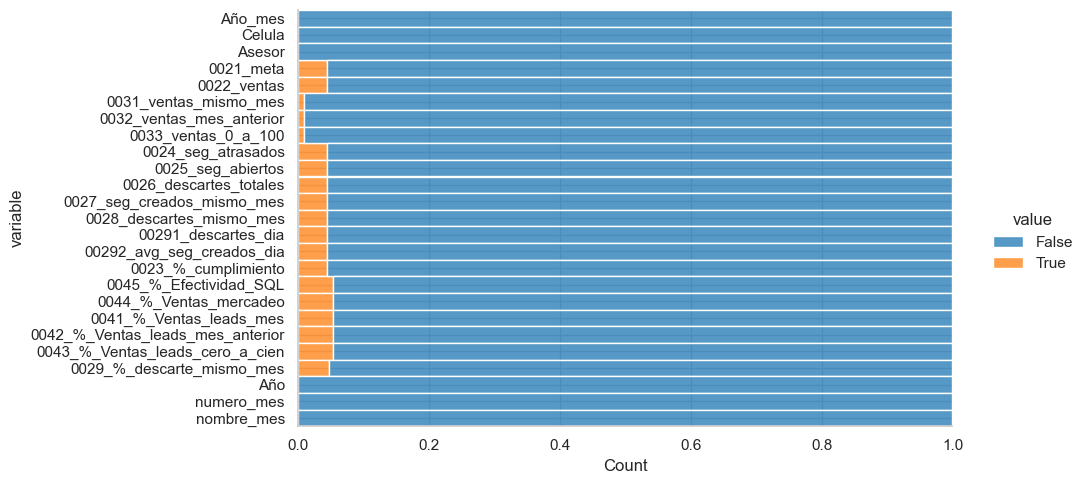

In [506]:
(
    df
    .isnull()
    .melt()
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                y='variable',
                hue='value',
                multiple='fill',
                aspect=2
            )
        )
    )
);

La proporción de `NaN` es muy pequeña en comparación con el dataset, podemos ver que la mayoria se encuentra en las columnas que continen `Seg` y estos son `Leads` creados en el CRM asi que no tendran. Por lo tanto, para fines practicos del ejercicio vamos a eliminarlos, ya que el impacto en nuestro análisis va a ser minimo.

## Visualización valores nulos por cada fila

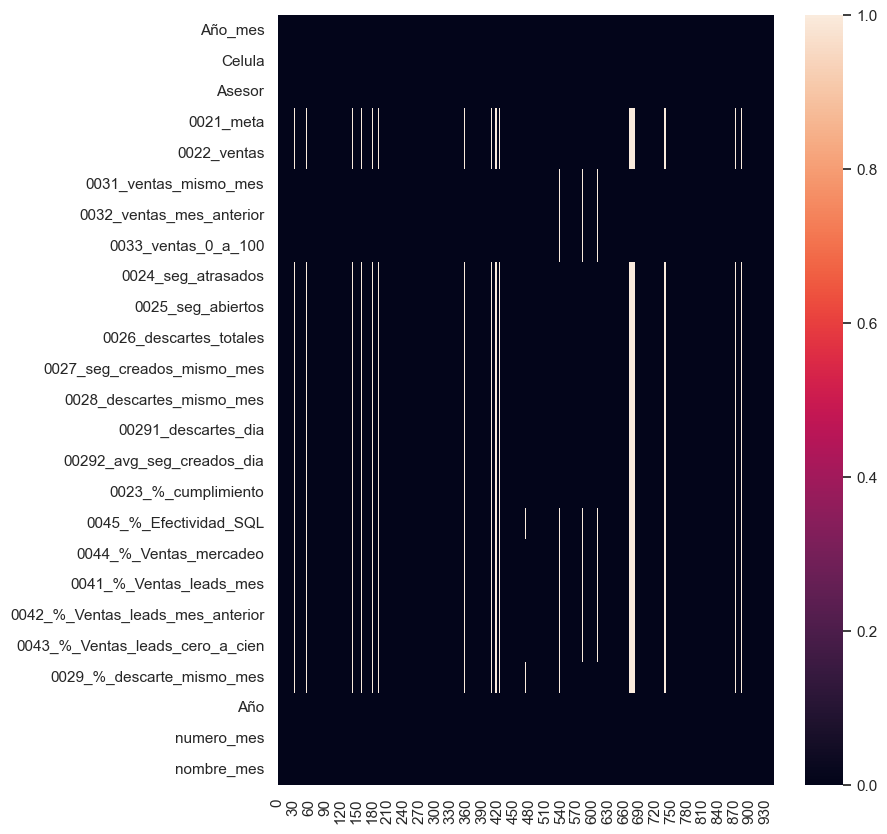

In [507]:
(
    df
    .isnull()
    .transpose()
    .pipe(
        lambda df: (
            sns.heatmap(
                data=df
            )
        )
    )
);

In [508]:
# inplace permite que los cambios sean permanentes
df.dropna(inplace=True)

In [509]:
df.isnull().sum()

Año_mes                             0
Celula                              0
Asesor                              0
0021_meta                           0
0022_ventas                         0
0031_ventas_mismo_mes               0
0032_ventas_mes_anterior            0
0033_ventas_0_a_100                 0
0024_seg_atrasados                  0
0025_seg_abiertos                   0
0026_descartes_totales              0
0027_seg_creados_mismo_mes          0
0028_descartes_mismo_mes            0
00291_descartes_dia                 0
00292_avg_seg_creados_dia           0
0023_%_cumplimiento                 0
0045_%_Efectividad_SQL              0
0044_%_Ventas_mercadeo              0
0041_%_Ventas_leads_mes             0
0042_%_Ventas_leads_mes_anterior    0
0043_%_Ventas_leads_cero_a_cien     0
0029_%_descarte_mismo_mes           0
Año                                 0
numero_mes                          0
nombre_mes                          0
dtype: int64

In [510]:
df.dtypes

Año_mes                               int64
Celula                               object
Asesor                               object
0021_meta                           float64
0022_ventas                         float64
0031_ventas_mismo_mes               float64
0032_ventas_mes_anterior            float64
0033_ventas_0_a_100                 float64
0024_seg_atrasados                  float64
0025_seg_abiertos                   float64
0026_descartes_totales              float64
0027_seg_creados_mismo_mes          float64
0028_descartes_mismo_mes            float64
00291_descartes_dia                 float64
00292_avg_seg_creados_dia           float64
0023_%_cumplimiento                 float64
0045_%_Efectividad_SQL              float64
0044_%_Ventas_mercadeo              float64
0041_%_Ventas_leads_mes             float64
0042_%_Ventas_leads_mes_anterior    float64
0043_%_Ventas_leads_cero_a_cien     float64
0029_%_descarte_mismo_mes           float64
Año                             

In [511]:
df.to_excel('./Dataset/dataset.xlsx', index=False)
df.to_csv('./Dataset/dataset.csv', index=False)

## Descripción de las variables númericas

In [512]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Año_mes,895.0,202106.427933,3.535550,202101.0000,202103.00000,202106.0000,202110.0000,202112.0000
0021_meta,895.0,55.808939,19.068765,10.0000,47.00000,55.0000,77.0000,83.0000
0022_ventas,895.0,36.622346,15.074251,2.0000,26.00000,36.0000,46.0000,100.0000
0031_ventas_mismo_mes,895.0,15.327374,7.889695,1.0000,10.00000,14.0000,20.0000,52.0000
0032_ventas_mes_anterior,895.0,3.227933,2.731354,0.0000,1.00000,3.0000,4.0000,25.0000
0033_ventas_0_a_100,895.0,6.957542,4.396509,0.0000,4.00000,6.0000,9.0000,31.0000
0024_seg_atrasados,895.0,3.852514,8.359413,0.0000,0.00000,1.0000,3.0000,78.0000
0025_seg_abiertos,895.0,37.071508,17.043746,0.0000,25.00000,35.0000,47.0000,103.0000
0026_descartes_totales,895.0,72.720670,43.347333,2.0000,42.00000,62.0000,90.0000,271.0000
0027_seg_creados_mismo_mes,895.0,76.256983,30.949748,1.0000,53.50000,72.0000,95.0000,211.0000


## Descripción de las variables Object

In [513]:
df.describe(include='object').T

,count,unique,top,freq
Celula,895,6,DG1,161
Asesor,895,109,A34,12
nombre_mes,895,12,febrero,83


## Rango de las variables

In [514]:
df.max(numeric_only=True) - df.min(numeric_only=True)

Año_mes                              11.0000
0021_meta                            73.0000
0022_ventas                          98.0000
0031_ventas_mismo_mes                51.0000
0032_ventas_mes_anterior             25.0000
0033_ventas_0_a_100                  31.0000
0024_seg_atrasados                   78.0000
0025_seg_abiertos                   103.0000
0026_descartes_totales              269.0000
0027_seg_creados_mismo_mes          210.0000
0028_descartes_mismo_mes            174.0000
00291_descartes_dia                  22.0000
00292_avg_seg_creados_dia            10.0000
0023_%_cumplimiento                   2.4949
0045_%_Efectividad_SQL                0.9834
0044_%_Ventas_mercadeo                0.9583
0041_%_Ventas_leads_mes               0.9583
0042_%_Ventas_leads_mes_anterior      0.3750
0043_%_Ventas_leads_cero_a_cien       0.6667
0029_%_descarte_mismo_mes             0.9388
Año                                   0.0000
numero_mes                           11.0000
dtype: flo

## Ventas en periodo 2021

In [515]:
x = df.groupby(['nombre_mes', 'numero_mes'])['0022_ventas'].sum().reset_index()
x = x.sort_values(by='numero_mes')

<AxesSubplot:xlabel='nombre_mes', ylabel='0022_ventas'>

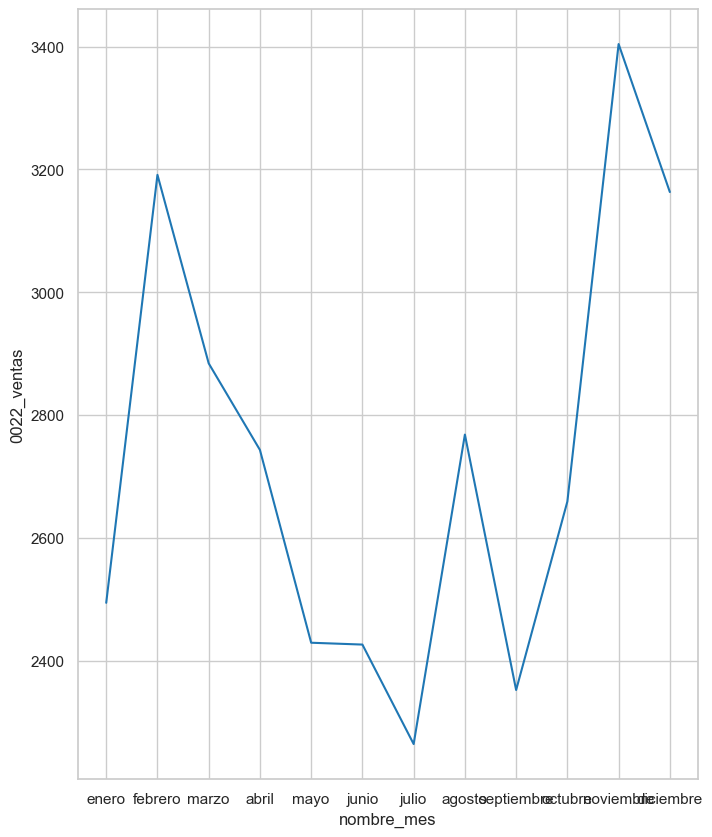

In [516]:
sns.lineplot(
    x=x['nombre_mes'],
    y=x['0022_ventas']
)

## Top 3 meses con mayor ventas

In [517]:
top_3_mes_ventas = df.groupby('nombre_mes')['0022_ventas'].sum().sort_values(ascending=False).reset_index().head(3)
print(top_3_mes_ventas)

  nombre_mes  0022_ventas
0  noviembre       3404.0
1    febrero       3191.0
2  diciembre       3163.0


<AxesSubplot:xlabel='nombre_mes', ylabel='0022_ventas'>

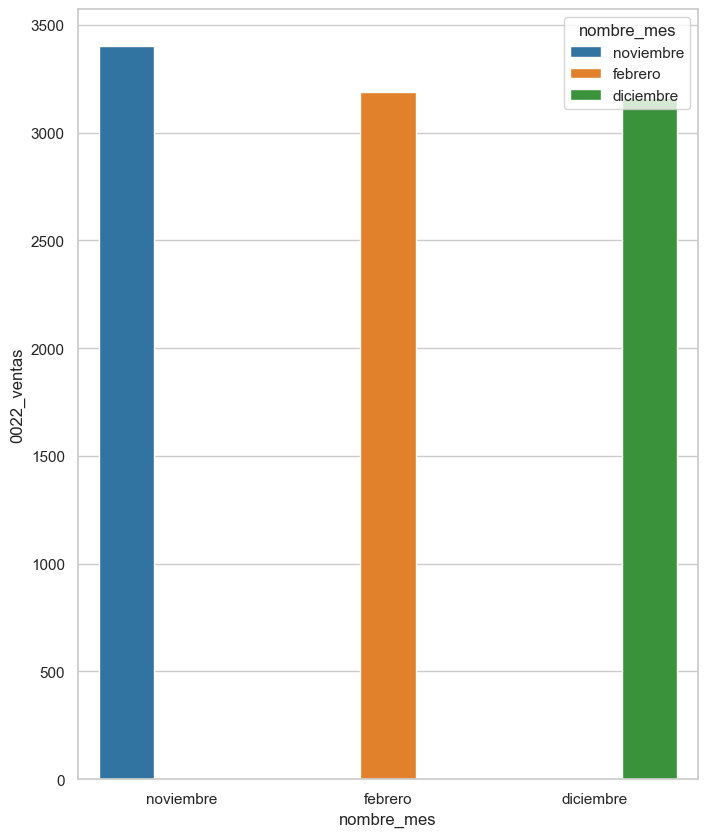

In [518]:
sns.barplot(
    data=top_3_mes_ventas,
    x='nombre_mes',
    y='0022_ventas',
    hue='nombre_mes'
)

## ¿Cuál celula es la que más vende?

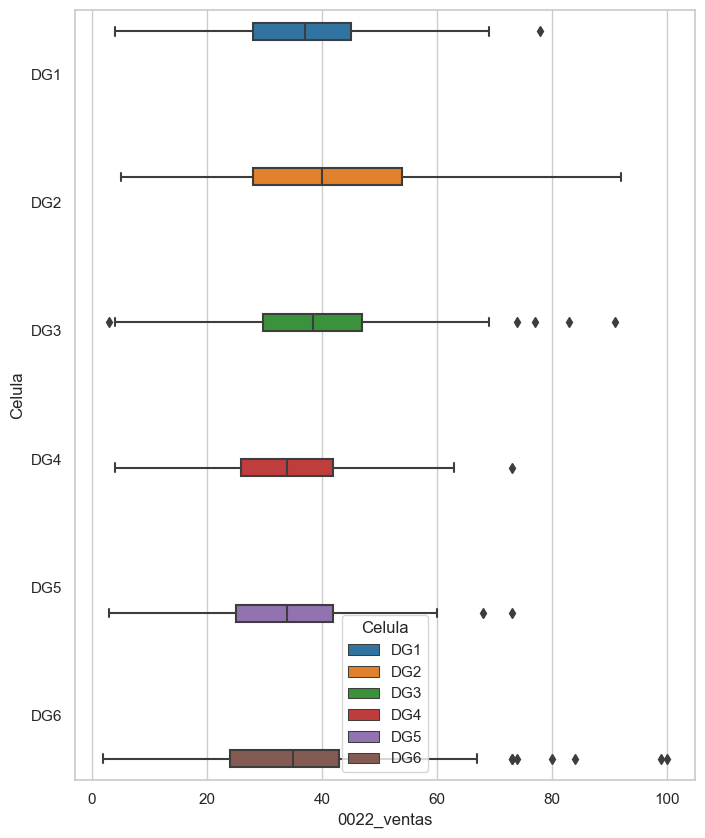

In [519]:
sns.boxplot(
    data=df,
    x='0022_ventas',
    y='Celula',
    hue='Celula'
);

## ¿Cuál celula tiene el mayor cumplimiento?

<AxesSubplot:xlabel='0023_%_cumplimiento', ylabel='Celula'>

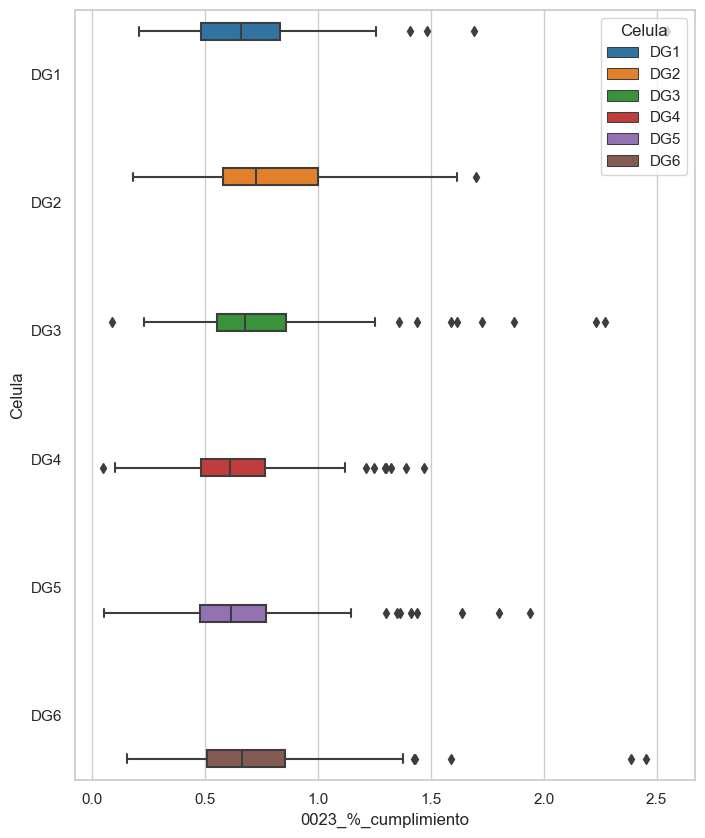

In [520]:
sns.boxplot(
    data=df,
    x='0023_%_cumplimiento',
    y='Celula',
    hue='Celula'
)

La celula DG2 es la que más vende y la que tiene mayor cumplimiento de cuota.

## Correlaciones de variables

In [521]:
x = df.corr()
print(x)

                                   Año_mes  0021_meta  0022_ventas  \
Año_mes                           1.000000   0.192264     0.118847   
0021_meta                         0.192264   1.000000     0.489335   
0022_ventas                       0.118847   0.489335     1.000000   
0031_ventas_mismo_mes             0.077217   0.189793     0.666080   
0032_ventas_mes_anterior          0.172439   0.295193     0.486733   
0033_ventas_0_a_100               0.118898   0.157956     0.569911   
0024_seg_atrasados               -0.152580  -0.060378     0.000277   
0025_seg_abiertos                -0.025679   0.032267     0.216242   
0026_descartes_totales           -0.300617  -0.021194     0.090772   
0027_seg_creados_mismo_mes       -0.202692   0.106308     0.315526   
0028_descartes_mismo_mes         -0.257752   0.071575     0.081539   
00291_descartes_dia               0.159384   0.017837     0.074383   
00292_avg_seg_creados_dia        -0.242457   0.112949     0.300282   
0023_%_cumplimiento 

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_14176\1006886549.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  x = df.corr()


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_14176\1712561276.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data=df.corr(),


<AxesSubplot:>

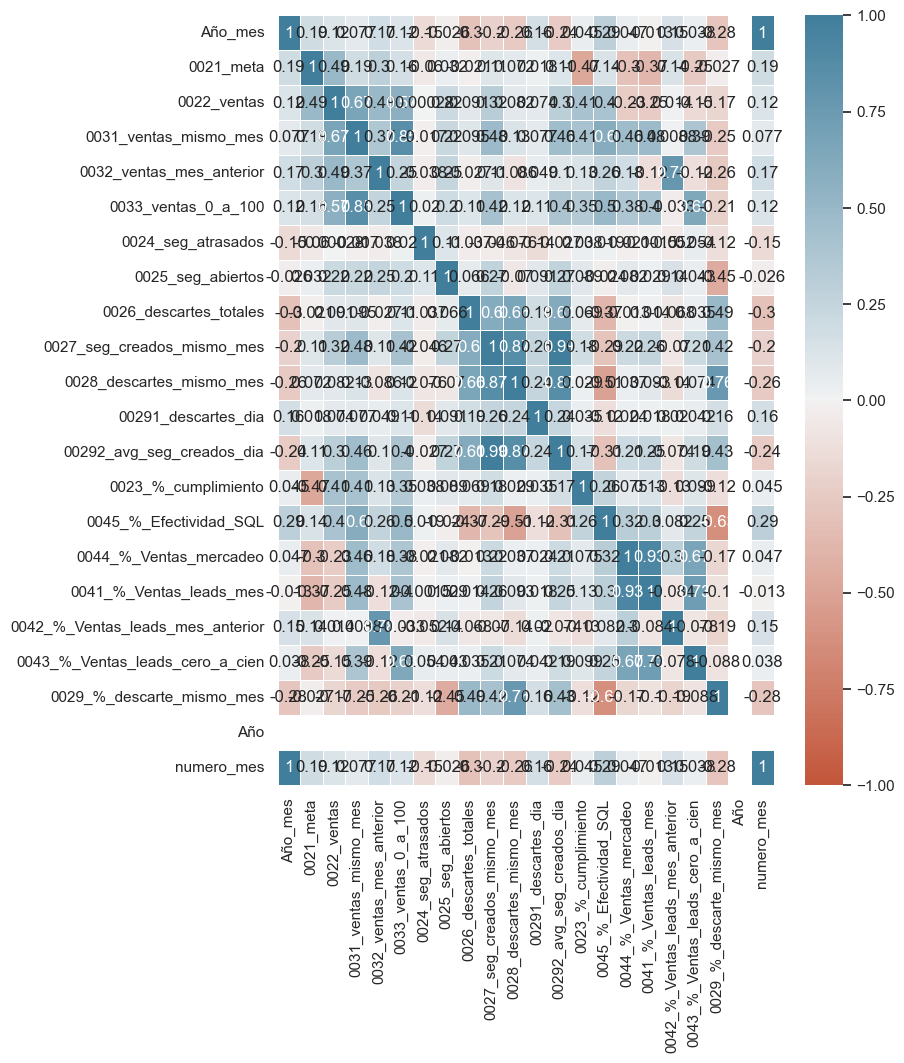

In [522]:
sns.heatmap(
    data=df.corr(),
    cmap=sns.diverging_palette(20, 230, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    annot=True
)

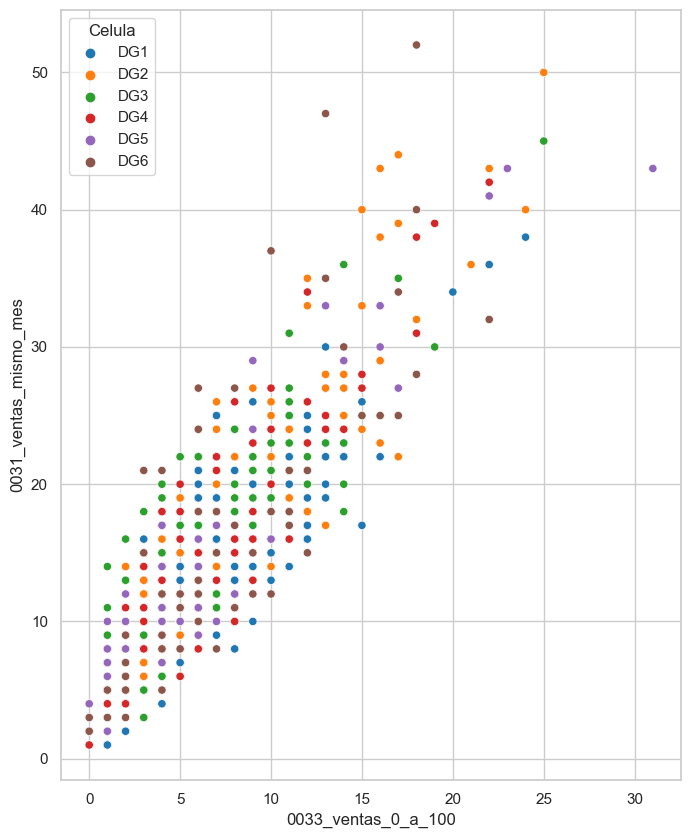

In [523]:
sns.scatterplot(
    data=df,
    x='0033_ventas_0_a_100',
    y='0031_ventas_mismo_mes',
    hue='Celula'
);

Existe una relación positiva fuerte entre estas dos variables demostrando que los Leads que proporciona el area de mercadeo son muy buenos, impactando de manera positiva las habilidades de cerrar la venta de los asesores